** Logistic Regression **

In [5]:
%matplotlib inline
%run 'TrainingData.ipynb'
%run 'DisplayHelpers.ipynb'

Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
import matplotlib.pyplot as plt
import sklearn.metrics.pairwise as smp
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
from sklearn.cross_validation import KFold
from scipy.sparse import lil_matrix

myappdata = TrainingData()

N Fold Precision = 0.615548038746 Recall 0.598651557496 Fscore 0.603087013683
N Fold Precision = 0.584750285876 Recall 0.578922832976 Fscore 0.578276996144
N Fold Precision = 0.580551993856 Recall 0.566743135935 Fscore 0.570327545354
N Fold Precision = 0.616369336036 Recall 0.601834199017 Fscore 0.605733249831
N Fold Precision = 0.593143109519 Recall 0.581062782624 Fscore 0.583867626933
N Fold Precision = 0.60032897598 Recall 0.592993223908 Fscore 0.591898610139
N Fold Precision = 0.612855190005 Recall 0.598157438009 Fscore 0.602492455369
N Fold Precision = 0.615284689195 Recall 0.595132777949 Fscore 0.601373887035
N Fold Precision = 0.612704179813 Recall 0.6078176386 Fscore 0.606846404154
N Fold Precision = 0.614855723908 Recall 0.600635041275 Fscore 0.605178715788
Overall Precision = 0.604639152293 Recall 0.592195062779 fscore 0.594908250443


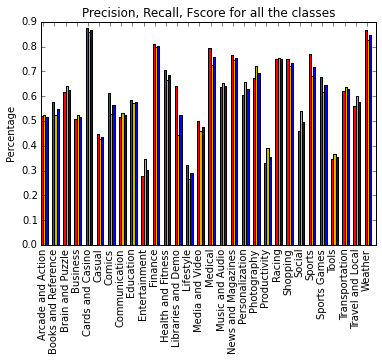

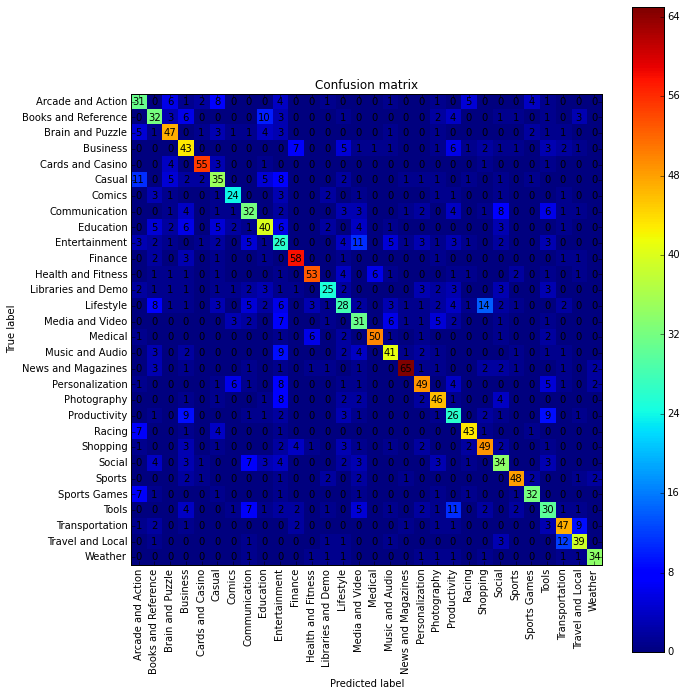

In [6]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn import linear_model

results = []

kf = KFold(n=20104, n_folds=10, random_state=42)
for train_idx, test_idx in kf:
    (train_data, train_labels) = myappdata.get_data_and_labels(train_idx)
    (test_data, test_labels) = myappdata.get_data_and_labels(test_idx)
    test_app_names = myappdata.get_app_names(test_idx)

    clf = linear_model.LogisticRegression(C=1e5)
    predict_labels_arr = clf.fit(train_data, train_labels).predict(test_data)
    
    (precision, recall, fscore, support) = precision_recall_fscore_support(test_labels, predict_labels_arr)
    
    results.append((precision, recall, fscore))
    cm = confusion_matrix(test_labels, predict_labels_arr, myappdata.total_sorted_app_labels)
    
    print("N Fold Precision = {0} Recall {1} Fscore {2}".format(sum(precision)/precision.size, 
                                                                sum(recall)/recall.size,
                                                                sum(fscore)/fscore.size))

average_precision =  [sum(elem)/len(elem) for elem in zip(*[x[0] for x in results])]
average_recall = [sum(elem)/len(elem) for elem in zip(*[x[1] for x in results])]
average_fscore = [sum(elem)/len(elem) for elem in zip(*[x[2] for x in results])]

print("Overall Precision = {0} Recall {1} fscore {2}".format(sum(average_precision)/len(average_precision), 
                                                  sum(average_recall)/len(average_recall),
                                                    sum(average_fscore)/len(average_fscore)))

plot_precision_and_recall(average_precision, average_recall, average_fscore, myappdata.total_sorted_app_labels)
plot_confusion_matrix(cm, myappdata.total_sorted_app_labels)